# Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [2]:
from DataPreprocessing import *

# Linear Regression usung Scitkit-learn Library

In [3]:
# Linear Regression
linear_regression = LinearRegression()

linear_regression.fit(X_train_std, y_train)

LinearRegression()

In [4]:
# Linear Regression - Training 
lin_train_pred = linear_regression.predict(X_train_std)
print(lin_train_pred)

# Linear Regression - Testing 
lin_test_pred = linear_regression.predict(X_test_std)
print(lin_test_pred)

[ 488519.12941351  258470.25578756  236497.3003939  ... -191430.78564712
  523722.62328266  548430.5451031 ]
[857762.44807366 560393.51717246 306598.12341217 ... 545884.97399163
 187086.33089794 286020.88335185]


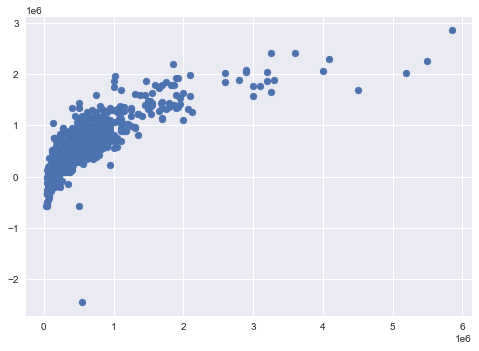

In [5]:
plt.scatter(y_test,lin_test_pred)

<AxesSubplot:xlabel='selling_price', ylabel='Density'>

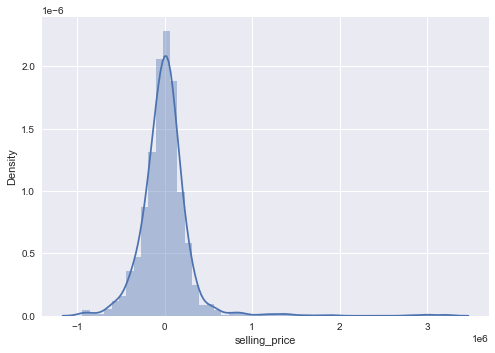

In [6]:
sns.distplot(y_test - lin_test_pred)

In [7]:
print('RMSE on train set:', np.sqrt(metrics.mean_squared_error(y_train, lin_train_pred)))
print('RMSE on test set:', np.sqrt(metrics.mean_squared_error(y_test, lin_test_pred)))

r2_score_train = metrics.r2_score(y_train, lin_train_pred)
print(f"Accuracy on Training: R Square: {r2_score_train}")
r2_score_test = metrics.r2_score(y_test, lin_test_pred)
print(f"Accuracy on Testing: R Square: {r2_score_test}")

RMSE on train set: 303581.6176214917
RMSE on test set: 316707.7767957077
Accuracy on Training: R Square: 0.6391372339546094
Accuracy on Testing: R Square: 0.6350810267524767


# Linear Regression using Gradient Descend Method

In [8]:
#Gradient Descend
class GDLinearRegression:
    def __init__(self, lr, step):
        '''
        Khởi tạo learning rate và số lượng step update weigh
        '''
        self.lr = lr
        self.step = step

    def fit(self, X, y):
        ''' 
        Train the model với đầu vào là tập train data X cùng nhãn Y
        X là ma trận MxN trong đó M là số lượng điểm dữ liệu, mỗi điểm dữ liệu có N chiều.
        Trường hợp dữ liệu 1 chiều thì X là vector cột Mx1
        '''
        # lấy ra số lượng điểm train_size và số chiều dữ liệu n_features
        self.n_features = X.shape[1] if len(X.shape) > 1 else 1 
        train_size = len(X) # số lượng sample

        # chuẩn hóa lại định dạng dữ liệu
        X = X.reshape(-1, self.n_features)
        y = y.values.reshape([-1, 1])

        # ta muốn thực hiện dự đoán y = X.T*W + bias, ta đưa bias vào W (W|bias) và 1 cột toàn 1 vào X (X|one),
        # lúc đó việc tính toán thuận tiện hơn y = (X|one).T*(W|bias) => đây là trick để tính toán cho nhanh
        one = np.ones([train_size, 1])
        X = np.concatenate([X, one], 1)

        # tạo weight chính là parameters ta sẽ optimize trong quá trình train
        self.weight = np.zeros([self.n_features + 1, 1])
        print('x shape: ', X.shape, '- y shape: ', y.shape, '- weight shape: ', self.weight.shape, 'train_size: ', train_size)

        # mảng lưu lại toàn bộ giá trị loss trong quá trình train
        self.train_loss = []

        # train
        for i in range(self.step):
            loss = np.sum((y - np.dot(X, self.weight)) ** 2)
            delta = np.dot(X.T, (np.dot(X, self.weight) - y))

            # update weight
            self.weight = self.weight - (self.lr/train_size) * delta

            # tính trung bình loss
            loss = loss/train_size
#             print(loss)
            
            self.train_loss.append(loss.item())

    def predict(self, X):
        '''
        Thực hiện dự đoán
        '''
        # chuẩn hóa format dữ liệu như ta đã làm trong lúc train
        X = X.reshape(-1, self.n_features)

        # thêm cột one như ta đã làm trong lúc train
        one = np.ones([len(X), 1])
        X = np.concatenate([X, one], 1)

        # thực hiện dự đoán, đơn giản là nhân ma trận
        y_hat = np.dot(X, self.weight)

        return y_hat

    def print_weight(self):
        '''
        In weigt đã học được
        '''
        print(self.weight)

    def get_train_loss(self):
        '''
        Trả về train loss đã lưu trong quá trình train
        '''
        return self.train_loss

x shape:  (5369, 13) - y shape:  (5369, 1) - weight shape:  (13, 1) train_size:  5369


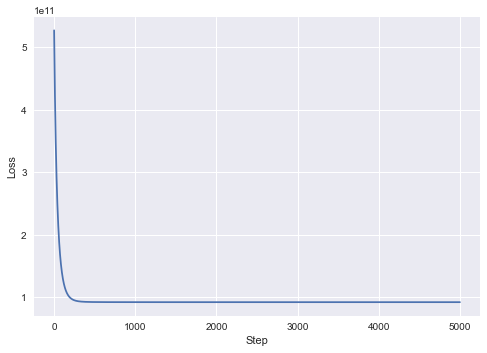

In [9]:
mymodel = GDLinearRegression(0.01, 5000)
# thực hiện train dữ liệu
mymodel.fit(X_train_std, y_train)

# vẽ biểu đồi training loss
train_loss = mymodel.get_train_loss()
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.show()

In [10]:
y_hat_test = mymodel.predict(X_test_std)
rmse_test = np.sqrt(metrics.mean_squared_error(y_hat_test, y_test))

# print mean squared error trên tập test
print('Test RMSE: ', rmse_test)
r2_score_test = metrics.r2_score(y_test, y_hat_test)
print(f"Accuracy on Testing: {r2_score_test}")

Test RMSE:  316708.99393233866
Accuracy on Testing: 0.6350782219138482


In [11]:
y_hat_train = mymodel.predict(X_train_std)
rmse_train = np.sqrt(metrics.mean_squared_error(y_hat_train, y_train))

# print mean squared error trên tập train
print('Train RMSE: ', rmse_train)
r2_score_train = metrics.r2_score(y_train, y_hat_train)
print(f"Accuracy on Training: {r2_score_train}")

Train RMSE:  303581.617819906
Accuracy on Training: 0.6391372334829056


# Improve Model

In [12]:
Q1 = df['selling_price'].quantile(0.25)
Q3 = df['selling_price'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
print(df['selling_price'].value_counts())
filter = (df['selling_price'] >= Q1 - 1.5 * IQR) & (df['selling_price'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  
print(df['selling_price'].value_counts())
print(Q1, Q3)
df.shape

300000     208
350000     196
600000     167
400000     164
250000     161
          ... 
1031000      1
426999       1
1270000      1
211000       1
746000       1
Name: selling_price, Length: 667, dtype: int64
300000    208
350000    196
600000    167
400000    164
250000    161
         ... 
486000      1
242000      1
654000      1
408000      1
746000      1
Name: selling_price, Length: 545, dtype: int64
250000.0 650000.0


(6411, 13)

In [13]:
A = df.drop(columns=["selling_price"])
b = df["selling_price"]
A_train, A_test, b_train, b_test = train_test_split(A,b,train_size = 0.8, random_state=0)


In [14]:
sc = StandardScaler()
A_train_std = sc.fit_transform(A_train)
A_test_std = sc.transform(A_test)

In [15]:
# Linear Regression
linear_regression_improve = LinearRegression()

linear_regression_improve.fit(A_train_std, b_train)

LinearRegression()

In [16]:
# Linear Regression - Training 
lin_train_pred = linear_regression_improve.predict(A_train_std)
print(lin_train_pred)

# Linear Regression - Testing 
lin_test_pred = linear_regression_improve.predict(A_test_std)
print(lin_test_pred)

[380787.42699238 566026.42305484 563626.61140273 ... 217661.56955978
 643221.1430787  155656.50195   ]
[357815.72979479 535705.39371838 556496.61875989 ... 593829.43938727
 460471.75940943 490914.45989153]


In [17]:
print('RMSE on train set after improving:', np.sqrt(metrics.mean_squared_error(b_train, lin_train_pred)))
print('RMSE on test set after improving:', np.sqrt(metrics.mean_squared_error(b_test, lin_test_pred)))

r2_score_train = metrics.r2_score(b_train, lin_train_pred)
print(f"Accuracy on Training after improving: R Square: {r2_score_train}")
r2_score_test = metrics.r2_score(b_test, lin_test_pred)
print(f"Accuracy on Testing after improving: R Square: {r2_score_test}")

RMSE on train set after improving: 139317.06124518046
RMSE on test set after improving: 145473.4160546363
Accuracy on Training after improving: R Square: 0.6996708801237379
Accuracy on Testing after improving: R Square: 0.6552850742392686


# Features Importance

In [18]:
importances = abs(linear_regression_improve.coef_)

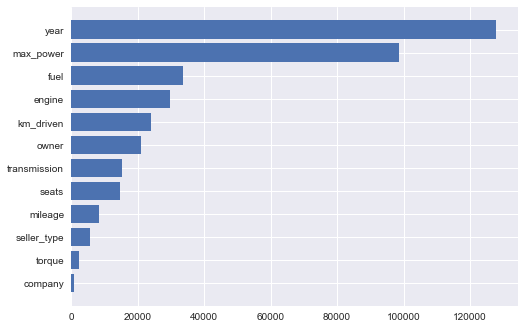

In [19]:
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

# Prediction

In [20]:
X_test_predict = X_test_std[0:3]
X_test_predict

array([[ 1.38954455, -1.08145768,  1.11558082,  0.30072914, -3.3142684 ,
        -0.74641118,  0.626382  , -0.47460479, -0.18362431, -1.34744894,
        -0.44536017,  0.33188388],
       [ 1.38954455, -0.67091488,  1.11558082,  0.30072914,  0.30172571,
        -0.74641118,  0.4298544 , -0.47460479, -0.18362431, -1.34744894,
        -0.44536017,  0.33188388],
       [ 0.87204969, -0.30142637,  1.11558082,  0.30072914,  0.30172571,
        -0.74641118,  1.29805861, -1.28731519, -1.27964718,  1.4188324 ,
        -0.44536017,  0.33188388]])

In [21]:
y_test

1363     700000
3171     550000
2201     275000
6483     235000
6104     375000
         ...   
2384    3600000
3214    1000000
3542     700000
6395     150000
5739     254999
Name: selling_price, Length: 1343, dtype: int64

In [22]:
y_predict = linear_regression_improve.predict(X_test_predict)
y_predict

array([637609.19775916, 570838.36579312, 377354.88899303])

In [23]:
pd.DataFrame({"y_test": y_test.values[0:3], "y_predict": y_predict})

,y_test,y_predict
0,700000,637609.197759
1,550000,570838.365793
2,275000,377354.888993
